In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly as pl
import matplotlib.pyplot as plt
from wordcloud import WordCloud



In [3]:
datos=pd.read_csv ("C:/Users/The Bridge/Desktop/EDA/Ticket Customer Serivce Dataset.zip")

In [4]:
#agregamos la función isnull. 
datos.isnull().sum()


#Si lo prefieres puedes usar:
#datos.notnull()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [5]:
#datos.fillna(column= "First Response Time", )
columns_to_fill = ['First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']
datos[columns_to_fill] = datos[columns_to_fill].fillna(0)

In [6]:
datos

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,0,0.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,0,0.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,0,0,0.0
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,0,0,0.0
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [7]:
datos = datos.drop_duplicates(subset=['Ticket ID'])


In [8]:
datos

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,0,0.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,0,0.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,0,0,0.0
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,0,0,0.0
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [9]:
datos.keys()

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [10]:
datos.drop(columns=['Customer Email', "Customer Name", "Resolution", "Ticket Description", "Ticket Subject"], inplace=True)


In [120]:

# quitar esto y darle un sentido a la data que falta NaN = 0 

In [11]:
datos

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,32,Other,GoPro Hero,2021-03-22,Technical issue,Pending Customer Response,Critical,Social media,2023-06-01 12:15:36,0,0.0
1,2,42,Female,LG Smart TV,2021-05-22,Technical issue,Pending Customer Response,Critical,Chat,2023-06-01 16:45:38,0,0.0
2,3,48,Other,Dell XPS,2020-07-14,Technical issue,Closed,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Closed,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Closed,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,22,Female,LG OLED,2021-12-08,Product inquiry,Open,Low,Phone,0,0,0.0
8465,8466,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Open,Critical,Email,0,0,0.0
8466,8467,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Closed,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,54,Male,PlayStation,2021-10-16,Product inquiry,Closed,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [12]:
datos.isnull()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8464,False,False,False,False,False,False,False,False,False,False,False,False
8465,False,False,False,False,False,False,False,False,False,False,False,False
8466,False,False,False,False,False,False,False,False,False,False,False,False
8467,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
datos["First Response Time"] = np.where(datos["First Response Time"] != 0, 1, datos["First Response Time"])


In [20]:
datos["Time to Resolution"] = np.where(datos["Time to Resolution"] != 0, 1, datos["Time to Resolution"])


In [21]:
datos

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,32,Other,GoPro Hero,2021-03-22,Technical issue,Pending Customer Response,Critical,Social media,1,0,0.0
1,2,42,Female,LG Smart TV,2021-05-22,Technical issue,Pending Customer Response,Critical,Chat,1,0,0.0
2,3,48,Other,Dell XPS,2020-07-14,Technical issue,Closed,Low,Social media,1,1,3.0
3,4,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Closed,Low,Social media,1,1,3.0
4,5,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Closed,Low,Email,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,22,Female,LG OLED,2021-12-08,Product inquiry,Open,Low,Phone,0,0,0.0
8465,8466,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Open,Critical,Email,0,0,0.0
8466,8467,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Closed,High,Social media,1,1,3.0
8467,8468,54,Male,PlayStation,2021-10-16,Product inquiry,Closed,Medium,Email,1,1,3.0


In [196]:
datos["Customer Satisfaction Rating"].unique()

array([0., 3., 1., 4., 5., 2.])

In [14]:
datos["Customer Age"].mean()

44.02680363679301

In [15]:
datos["Ticket Type"].describe()

count               8469
unique                 5
top       Refund request
freq                1752
Name: Ticket Type, dtype: object

In [16]:
datos["Ticket Type"].value_counts()

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

**TIPOS DE TICKET**

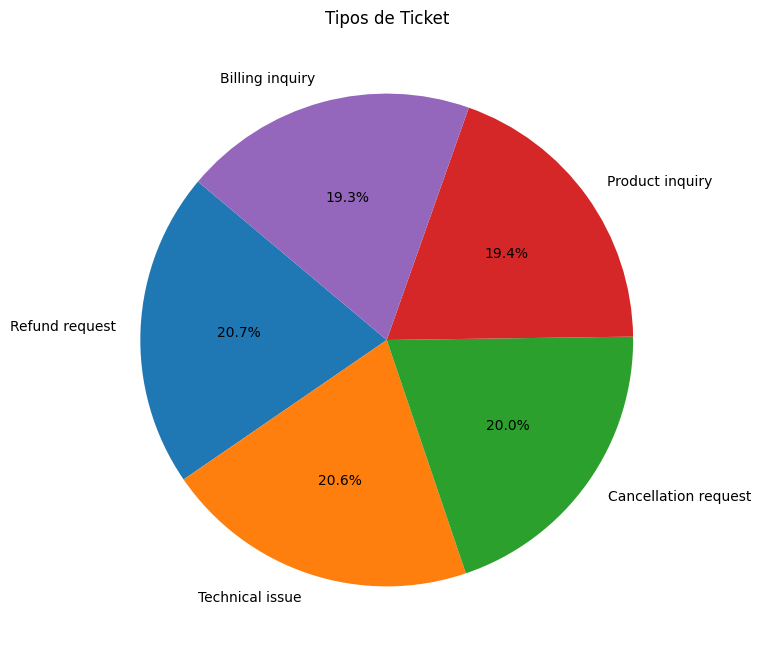

In [17]:

ticket_type_counts = datos["Ticket Type"].value_counts()

colores = plt.cm.tab10.colors[:len(ticket_type_counts)]

plt.figure(figsize=(8, 8))

plt.pie(ticket_type_counts, labels=ticket_type_counts.index, autopct='%1.1f%%', startangle=140, colors=colores)

plt.title('Tipos de Ticket')

plt.show()


In [246]:
ticket_types = datos["Ticket Type"].unique()

ticket_status_mas_recurrente = {}

for ticket_type in ticket_types:
    df_ticket_type = datos[datos["Ticket Type"] == ticket_type]
    ticket_status_mas_recurrente[ticket_type] = df_ticket_type["Ticket Status"].mode()[0]

for ticket_type, ticket_status in ticket_status_mas_recurrente.items():
    print(f"Para el ticket type '{ticket_type}', el Ticket Status más recurrente es '{ticket_status}'.")


Para el ticket type 'Technical issue', el Ticket Status más recurrente es 'Open'.
Para el ticket type 'Billing inquiry', el Ticket Status más recurrente es 'Pending Customer Response'.
Para el ticket type 'Cancellation request', el Ticket Status más recurrente es 'Pending Customer Response'.
Para el ticket type 'Product inquiry', el Ticket Status más recurrente es 'Pending Customer Response'.
Para el ticket type 'Refund request', el Ticket Status más recurrente es 'Closed'.


In [247]:
refund_tickets = datos[datos["Ticket Type"] == "Refund request"]

conteo_productos = refund_tickets["Product Purchased"].value_counts()

producto_mas_tickets = conteo_productos.idxmax()
cantidad_tickets = conteo_productos.max()

print(f"El producto de 'Product Purchased' con más tickets en 'Ticket Type' de 'Refund request' es '{producto_mas_tickets}' con {cantidad_tickets} tickets.")


El producto de 'Product Purchased' con más tickets en 'Ticket Type' de 'Refund request' es 'Sony PlayStation' con 77 tickets.


In [248]:
technical_issue_tickets = datos[datos["Ticket Type"] == "Technical issue"]


conteo_productos_technical_issue = technical_issue_tickets["Product Purchased"].value_counts()


producto_mas_tickets_technical_issue = conteo_productos_technical_issue.idxmax()
cantidad_tickets_technical_issue = conteo_productos_technical_issue.max()


print(f"El producto de 'Product Purchased' con más tickets en 'Ticket Type' de 'Technical issue' es '{producto_mas_tickets_technical_issue}' con {cantidad_tickets_technical_issue} tickets.")


El producto de 'Product Purchased' con más tickets en 'Ticket Type' de 'Technical issue' es 'Sony PlayStation' con 74 tickets.


In [253]:
sony_playstation_compras = datos[datos["Product Purchased"] == "Sony PlayStation"]

conteo_por_grupo = sony_playstation_compras.groupby(["Grupo Edad", "Customer Gender"]).size()

grupo_edad_mas_comun, customer_gender_mas_comun = conteo_por_grupo.idxmax()
total_compras_mas_comun = conteo_por_grupo.max()

combinacion_mas_comun = sony_playstation_compras[(sony_playstation_compras["Grupo Edad"] == grupo_edad_mas_comun) & (sony_playstation_compras["Customer Gender"] == customer_gender_mas_comun)]

ticket_type_mas_comun = combinacion_mas_comun["Ticket Type"].value_counts().idxmax()


print(f"Grupo de Edad y Customer Gender que más compran Sony PlayStation: {grupo_edad_mas_comun} y {customer_gender_mas_comun}")
print(f"Número total de compras para esta combinación: {total_compras_mas_comun}")
print(f"Tipo de Ticket más común para esta combinación: {ticket_type_mas_comun}")



Grupo de Edad y Customer Gender que más compran Sony PlayStation: 18-30 y Female
Número total de compras para esta combinación: 36
Tipo de Ticket más común para esta combinación: Cancellation request


C:\Users\The Bridge\AppData\Local\Temp\ipykernel_23372\3525048556.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_por_grupo = sony_playstation_compras.groupby(["Grupo Edad", "Customer Gender"]).size()


In [257]:
refund_requests = datos[datos["Ticket Type"] == "Refund Request"]

grupo_edad_refund = refund_requests.groupby("Grupo Edad").size()

grupo_edad_mas_refund = grupo_edad_refund.idxmax()
total_refund_mas_comun = grupo_edad_refund.max()

print(f"Grupo de Edad que más pide Refund Request: {grupo_edad_mas_refund}")
print(f"Número total de solicitudes de Refund Request para este grupo de edad: {total_refund_mas_comun}")


Grupo de Edad que más pide Refund Request: 18-30
Número total de solicitudes de Refund Request para este grupo de edad: 0


C:\Users\The Bridge\AppData\Local\Temp\ipykernel_23372\3533296489.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_edad_refund = refund_requests.groupby("Grupo Edad").size()


In [251]:
#  "Refund request"
refund_request_tickets = datos[datos["Ticket Type"] == "Refund request"]

conteo_refund_request_por_producto = refund_request_tickets.groupby("Product Purchased").size()

print(conteo_refund_request_por_producto.sort_values(ascending=False))


Product Purchased
Sony PlayStation                  77
Sony Xperia                       52
Amazon Echo                       51
Nikon D                           51
GoPro Hero                        50
Canon DSLR Camera                 50
Canon EOS                         50
Nest Thermostat                   49
Dell XPS                          49
Roomba Robot Vacuum               48
Fitbit Charge                     46
Samsung Galaxy                    46
Microsoft Surface                 45
Sony 4K HDR TV                    44
Amazon Kindle                     44
Garmin Forerunner                 43
MacBook Pro                       43
Google Nest                       43
LG Washing Machine                43
Fitbit Versa Smartwatch           42
Bose SoundLink Speaker            42
HP Pavilion                       42
iPhone                            42
Philips Hue Lights                41
LG OLED                           41
Microsoft Office                  40
Nintendo Switch Pro 

In [77]:

conteo_variables = datos['Ticket Type'].value_counts()

variable_mas_comun = conteo_variables.index[0]

repeticiones_variable_mas_comun = conteo_variables.iloc[0]

print("La variable que más se repite es:", variable_mas_comun)
print("Número de repeticiones:", repeticiones_variable_mas_comun)


La variable que más se repite es: Refund request
Número de repeticiones: 1752


In [80]:
#TOP 5 PRODUCTOS Y SUS RAZONES DE QUEJA 

import pandas as pd


top_5_ticket_subjects = datos['Ticket Type'].value_counts().head(5).index

relaciones = {}

for subject in top_5_ticket_subjects:
    
    subset_data = datos[datos['Ticket Type'] == subject]
    
    top_products = subset_data['Product Purchased'].value_counts().head()
    
    relaciones[subject] = top_products

for subject, products in relaciones.items():
    print(f"Razón del Ticket: {subject}")
    print(products)
    print()


Razón del Ticket: Refund request
Product Purchased
Sony PlayStation    52
Sony Xperia         52
Nikon D             51
Amazon Echo         51
Canon EOS           50
Name: count, dtype: int64

Razón del Ticket: Technical issue
Product Purchased
GoPro Hero           57
Garmin Forerunner    48
Canon EOS            48
Amazon Echo          48
Apple AirPods        46
Name: count, dtype: int64

Razón del Ticket: Cancellation request
Product Purchased
LG Smart TV                  53
Microsoft Xbox Controller    53
LG OLED                      52
Google Pixel                 50
Philips Hue Lights           49
Name: count, dtype: int64

Razón del Ticket: Product inquiry
Product Purchased
Canon EOS               52
Nest Thermostat         50
LG Smart TV             49
Google Pixel            48
Dyson Vacuum Cleaner    47
Name: count, dtype: int64

Razón del Ticket: Billing inquiry
Product Purchased
Apple AirPods        55
iPhone               51
Google Nest          49
Bose QuietComfort    49
Ca

In [ ]:
datos["Product Purchased"].unique()

array(['Dell XPS', 'Microsoft Office', 'Autodesk AutoCAD',
       'Nintendo Switch', 'Microsoft Xbox Controller', 'Sony PlayStation',
       'Xbox', 'Canon EOS', 'Fitbit Charge', 'GoPro Action Camera',
       'GoPro Hero', 'Google Pixel', 'HP Pavilion',
       'Nintendo Switch Pro Controller', 'LG Smart TV', 'Nest Thermostat',
       'Apple AirPods', 'Sony 4K HDR TV', 'Canon DSLR Camera',
       'Dyson Vacuum Cleaner', 'Roomba Robot Vacuum', 'PlayStation',
       'Sony Xperia', 'Samsung Galaxy', 'Asus ROG', 'Amazon Echo',
       'iPhone', 'Google Nest', 'Adobe Photoshop', 'LG Washing Machine',
       'Philips Hue Lights', 'Bose SoundLink Speaker',
       'Garmin Forerunner', 'Samsung Soundbar', 'MacBook Pro',
       'Microsoft Surface', 'LG OLED', 'Amazon Kindle',
       'Bose QuietComfort', 'Fitbit Versa Smartwatch', 'Lenovo ThinkPad',
       'Nikon D'], dtype=object)

In [227]:
#PRODUCTOS CON MÁS CERRADOS
closed_por_producto = datos[datos["Ticket Status"] == "Closed"].groupby("Product Purchased").size()

total_tickets_por_producto = datos.groupby("Product Purchased").size()

porcentaje_closed_por_producto = (closed_por_producto / total_tickets_por_producto) * 100

print(porcentaje_closed_por_producto.sort_values(ascending=False).head(5))





Product Purchased
Microsoft Office     40.000000
Canon DSLR Camera    39.320388
iPhone               38.679245
Sony Xperia          35.944700
Bose QuietComfort    35.789474
dtype: float64


In [233]:
# PRODUCTOS MÁS EXITOSOS 
total_tickets_por_producto = datos["Product Purchased"].value_counts()

closed_por_producto = datos[datos["Ticket Status"] == "Closed"]["Product Purchased"].value_counts()

pending_por_producto = datos[datos["Ticket Status"] == "Pending Customer Response"]["Product Purchased"].value_counts()


suma_status= pending_por_producto + closed_por_producto

porcentaje= suma_status/total_tickets_por_producto*100

print(porcentaje.sort_values(ascending=False).head(5))




Product Purchased
Xbox                 73.796791
LG OLED              72.769953
LG Smart TV          70.776256
iPhone               70.754717
Canon DSLR Camera    70.388350
Name: count, dtype: float64


In [245]:
#PRODUCTOS CON MENOS RESPUESTA EFECTIVA 

total_tickets_por_producto = datos["Product Purchased"].value_counts()

closed_por_producto = datos[datos["Ticket Status"] == "Closed"]["Product Purchased"].value_counts()

pending_por_producto = datos[datos["Ticket Status"] == "Pending Customer Response"]["Product Purchased"].value_counts()


suma_status= pending_por_producto + closed_por_producto

porcentaje= suma_status/total_tickets_por_producto*100

porcentaje_de_open=((porcentaje-100)*-1)

porcentaje_de_open.sort_values(ascending=False).head(5)


Product Purchased
Nintendo Switch Pro Controller    40.394089
Philips Hue Lights                39.366516
LG Washing Machine                38.461538
Autodesk AutoCAD                  37.755102
Microsoft Xbox Controller         37.755102
Name: count, dtype: float64

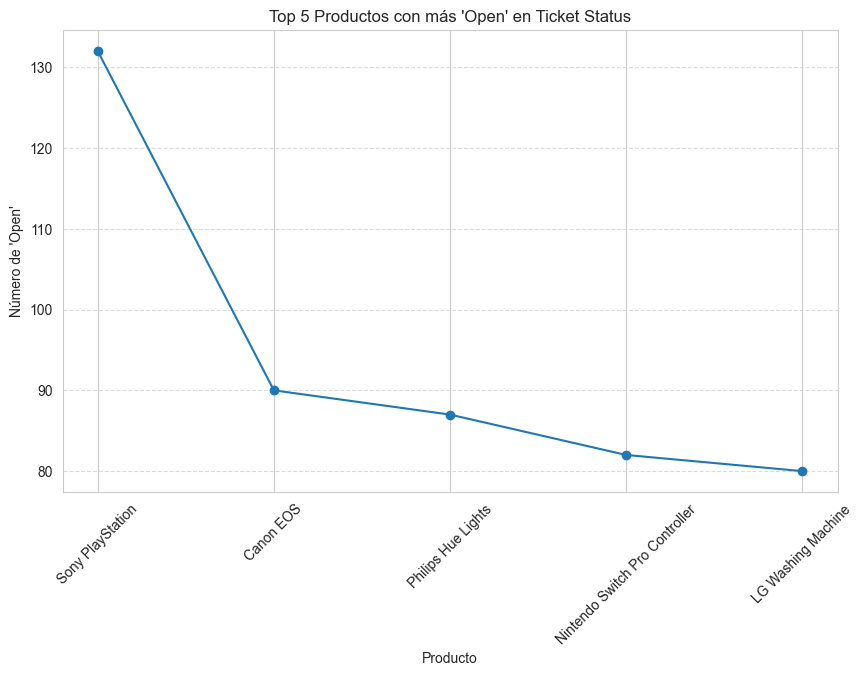

In [202]:

datos_open = datos[datos["Ticket Status"] == "Open"]

conteo_productos_open = datos_open["Product Purchased"].value_counts()

top_5_productos_open = conteo_productos_open.head(5)

plt.figure(figsize=(10, 6))
plt.plot(top_5_productos_open.index, top_5_productos_open.values, marker='o', linestyle='-')
plt.title("Top 5 Productos con más 'Open' en Ticket Status")
plt.xlabel("Producto")
plt.ylabel("Número de 'Open'")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



In [178]:

# Obtener el recuento de los usuarios por género
conteo_genero = datos['Customer Gender'].value_counts()

estadisticas_edad = datos['Customer Age'].describe()

print("Recuento de usuarios por género:")
print(conteo_genero)
print()

# Imprimir estadísticas descriptivas de la edad de los usuarios
print("Estadísticas descriptivas de la edad de los usuarios:")
print(estadisticas_edad)


Recuento de usuarios por género:
Customer Gender
Male      2896
Female    2887
Other     2686
Name: count, dtype: int64

Estadísticas descriptivas de la edad de los usuarios:
count    8469.000000
mean       44.026804
std        15.296112
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Customer Age, dtype: float64


In [ ]:
datos["Ticket Priority"].value_counts()

Ticket Priority
Critical    726
High        705
Medium      694
Low         644
Name: count, dtype: int64

In [180]:
datos["Ticket Channel"].value_counts()

#edad y canal de comunicacion/ aquí se puede ver el estatus tmb 

Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64

In [182]:

cross_tab = pd.crosstab(datos["Ticket Channel"], datos["Ticket Status"])

print(cross_tab)






Ticket Status   Closed  Open  Pending Customer Response
Ticket Channel                                         
Chat               674   685                        714
Email              720   701                        722
Phone              691   736                        705
Social media       684   697                        740


In [184]:
num_zeros = (datos["First Response Time"] == 0).sum()


In [183]:
datos["First Response Time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8469 entries, 0 to 8468
Series name: First Response Time
Non-Null Count  Dtype 
--------------  ----- 
8469 non-null   object
dtypes: object(1)
memory usage: 66.3+ KB


In [172]:

# Reemplazar todos los valores diferentes de 0 por 1 en la columna "First Response Time"
datos["First Response Time"] = np.where(datos["First Response Time"] != 0, 1, datos["First Response Time"])



In [175]:
# valores iguales a 1 en la columna "First Response Time"
suma_valores_1 = datos["First Response Time"].loc[datos["First Response Time"] == 1].sum()

print("La suma de todos los valores iguales a 1 en 'First Response Time' es:", suma_valores_1)


La suma de todos los valores iguales a 1 en 'First Response Time' es: 5650


In [174]:
datos["First Response Time"].sum()

5650

In [176]:
# Seleccionar todos los valores iguales a 0 en la columna "First Response Time"
valores_igual_0 = datos["First Response Time"].loc[datos["First Response Time"] == 0]

print("Valores iguales a 0 en 'First Response Time':")
print(valores_igual_0)


Valores iguales a 0 en 'First Response Time':
5       0
6       0
7       0
18      0
22      0
       ..
8461    0
8463    0
8464    0
8465    0
8468    0
Name: First Response Time, Length: 2819, dtype: object


In [168]:

categorias_edad = pd.cut(datos["Customer Age"], bins=[17, 30, 43, 56, 71], labels=["18-30", "31-43","44-55", "56-70"])

datos["Grupo Edad"] = categorias_edad

conteo_genero_por_edad = datos.groupby(["Grupo Edad", "Customer Gender"]).size().unstack()

conteo_genero_por_edad

C:\Users\The Bridge\AppData\Local\Temp\ipykernel_23372\1897725623.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_genero_por_edad = datos.groupby(["Grupo Edad", "Customer Gender"]).size().unstack()


Customer Gender,Female,Male,Other
Grupo Edad,,,
18-30,741,715,635
31-43,683,704,630
44-55,727,719,701
56-70,736,758,720


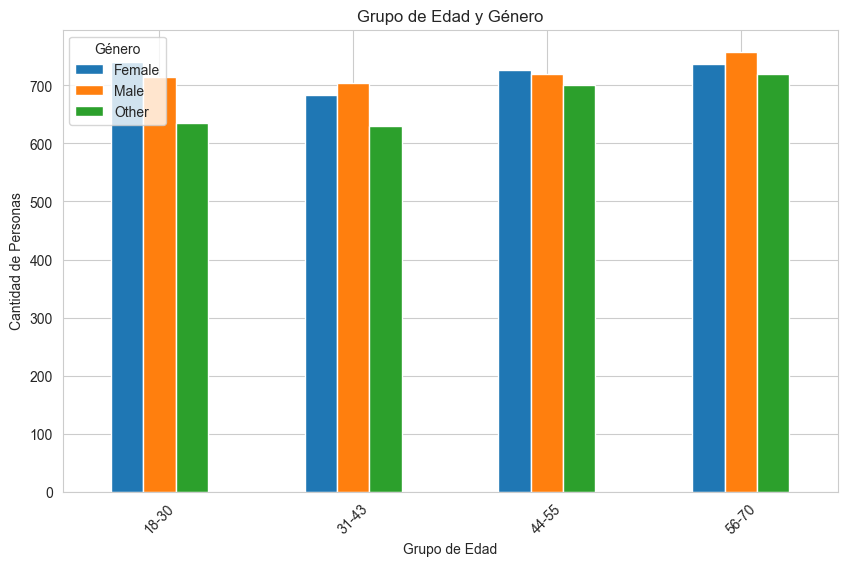

In [279]:
import matplotlib.pyplot as plt

# Graficar el conteo de personas por grupo de edad y género
conteo_genero_por_edad.plot(kind="bar", stacked=False, figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title("Grupo de Edad y Género")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad de Personas")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar la leyenda
plt.legend(title="Género", loc="upper left")

# Mostrar la gráfica
plt.show()


In [176]:
# Filtrar el DataFrame para incluir solo las filas con Customer Age entre 18 y 30
grupo_edad_18_30 = datos[(datos["Customer Age"] >= 17) & (datos["Customer Age"] <= 31)]
grupo_edad_31_43 = datos[(datos["Customer Age"] >= 31) & (datos["Customer Age"] <= 44)]
grupo_edad_44_55 = datos[(datos["Customer Age"] >= 44) & (datos["Customer Age"] <= 56)]
grupo_edad_56_70 = datos[(datos["Customer Age"] >= 56) & (datos["Customer Age"] <= 71)]

ticket_channel_mas_utilizado_18_30 = grupo_edad_18_30["Ticket Channel"].value_counts().idxmax()
ticket_channel_mas_utilizado_31_43 = grupo_edad_31_43["Ticket Channel"].value_counts().idxmax()
ticket_channel_mas_utilizado_44_55 = grupo_edad_44_55["Ticket Channel"].value_counts().idxmax()
ticket_channel_mas_utilizado_56_70 = grupo_edad_56_70["Ticket Channel"].value_counts().idxmax()

print("El Ticket Channel más utilizado por el grupo de edad de 18 a 30 años es:", ticket_channel_mas_utilizado_18_30)
print("El Ticket Channel más utilizado por el grupo de edad de 31 a 43 años es:", ticket_channel_mas_utilizado_31_43)
print("El Ticket Channel más utilizado por el grupo de edad de 44 a 55 años es:", ticket_channel_mas_utilizado_44_55)
print("El Ticket Channel más utilizado por el grupo de edad de 56 a 70 años es:", ticket_channel_mas_utilizado_56_70)



El Ticket Channel más utilizado por el grupo de edad de 18 a 30 años es: Social media
El Ticket Channel más utilizado por el grupo de edad de 31 a 43 años es: Social media
El Ticket Channel más utilizado por el grupo de edad de 44 a 55 años es: Chat
El Ticket Channel más utilizado por el grupo de edad de 56 a 70 años es: Email


In [189]:
datos["Ticket Status"].value_counts()

Ticket Status
Pending Customer Response    2881
Open                         2819
Closed                       2769
Name: count, dtype: int64

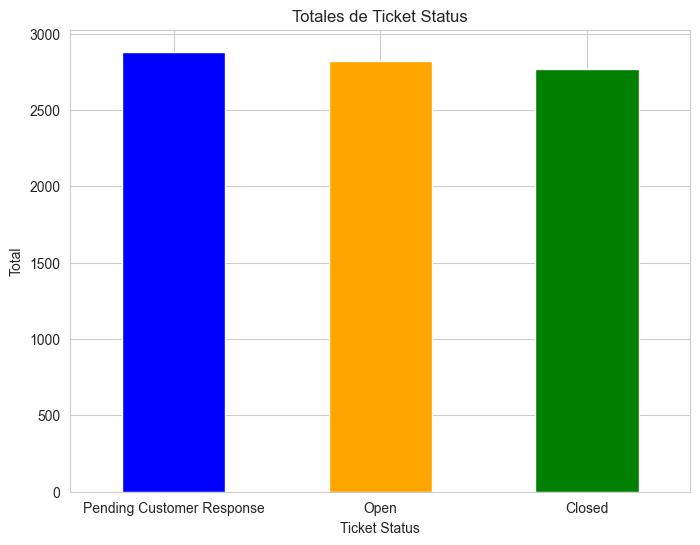

In [198]:


totales_ticket_status = datos["Ticket Status"].value_counts()

plt.figure(figsize=(8, 6))
totales_ticket_status.plot(kind="bar", color=["blue", "orange", "green"])

plt.title("Totales de Ticket Status")
plt.xlabel("Ticket Status")
plt.ylabel("Total")
plt.xticks(rotation=0)

plt.show()


In [190]:
tabla_frecuencias = pd.crosstab(datos["Grupo Edad"], datos["Ticket Status"])

print(tabla_frecuencias)


Ticket Status  Closed  Open  Pending Customer Response
Grupo Edad                                            
18-30             648   752                        691
31-43             664   631                        722
44-55             725   694                        728
56-70             732   742                        740


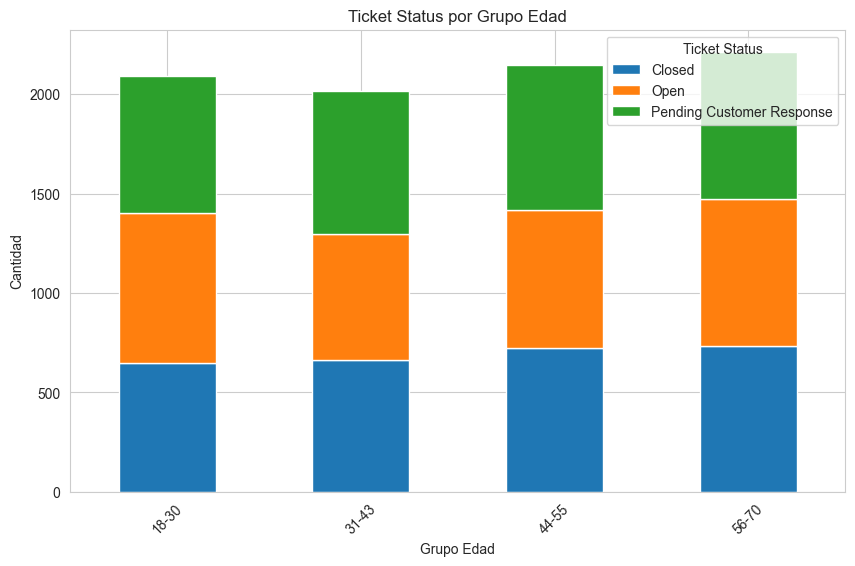

In [194]:
tabla_frecuencias.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title("Ticket Status por Grupo Edad")
plt.xlabel("Grupo Edad")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)

plt.legend(title="Ticket Status")

plt.show()


In [195]:
datos_filtrados = datos[datos["Customer Satisfaction Rating"] != 0.0]

frecuencia_por_grupo_edad = datos_filtrados["Grupo Edad"].value_counts()

grupo_edad_mas_frecuente = frecuencia_por_grupo_edad.idxmax()

print("El Grupo Edad con más 'Customer Satisfaction Rating' diferentes a 0.0 es:", grupo_edad_mas_frecuente)


El Grupo Edad con más 'Customer Satisfaction Rating' diferentes a 0.0 es: 56-70


In [197]:
#sATISFACCIÓN POR EDAD

conteo_por_grupo_edad_y_rating = datos.groupby(["Grupo Edad", "Customer Satisfaction Rating"]).size()


print(conteo_por_grupo_edad_y_rating)


Grupo Edad  Customer Satisfaction Rating
18-30       0.0                             1443
            1.0                              125
            2.0                              135
            3.0                              134
            4.0                              129
            5.0                              125
31-43       0.0                             1353
            1.0                              132
            2.0                              133
            3.0                              138
            4.0                              133
            5.0                              128
44-55       0.0                             1422
            1.0                              147
            2.0                              142
            3.0                              147
            4.0                              140
            5.0                              149
56-70       0.0                             1482
            1.0             

C:\Users\The Bridge\AppData\Local\Temp\ipykernel_23372\1382544685.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_por_grupo_edad_y_rating = datos.groupby(["Grupo Edad", "Customer Satisfaction Rating"]).size()


In [167]:
datos.isnull().sum()

Ticket ID                       0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Status                   0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
Grupo Edad                      0
dtype: int64

In [169]:
datos["Customer Gender"].value_counts()

Customer Gender
Male      2896
Female    2887
Other     2686
Name: count, dtype: int64

In [170]:
conteo_genero_por_edad.value_counts()

Female  Male  Other
683     704   630      1
727     719   701      1
736     758   720      1
741     715   635      1
Name: count, dtype: int64

***GRAFICAS***

In [145]:

numeric_columns = datos.select_dtypes(include=['float64', 'int64'])

matriz_correlacion = numeric_columns.corr()

print(matriz_correlacion)


                              Ticket ID  Customer Age  \
Ticket ID                      1.000000      0.007395   
Customer Age                   0.007395      1.000000   
Customer Satisfaction Rating  -0.003509      0.011087   

                              Customer Satisfaction Rating  
Ticket ID                                        -0.003509  
Customer Age                                      0.011087  
Customer Satisfaction Rating                      1.000000  


In [143]:
datos['Ticket Status'].value_counts(ascending=False)


Ticket Status
Pending Customer Response    2881
Open                         2819
Closed                       2769
Name: count, dtype: int64

<Figure size 3000x1000 with 0 Axes>

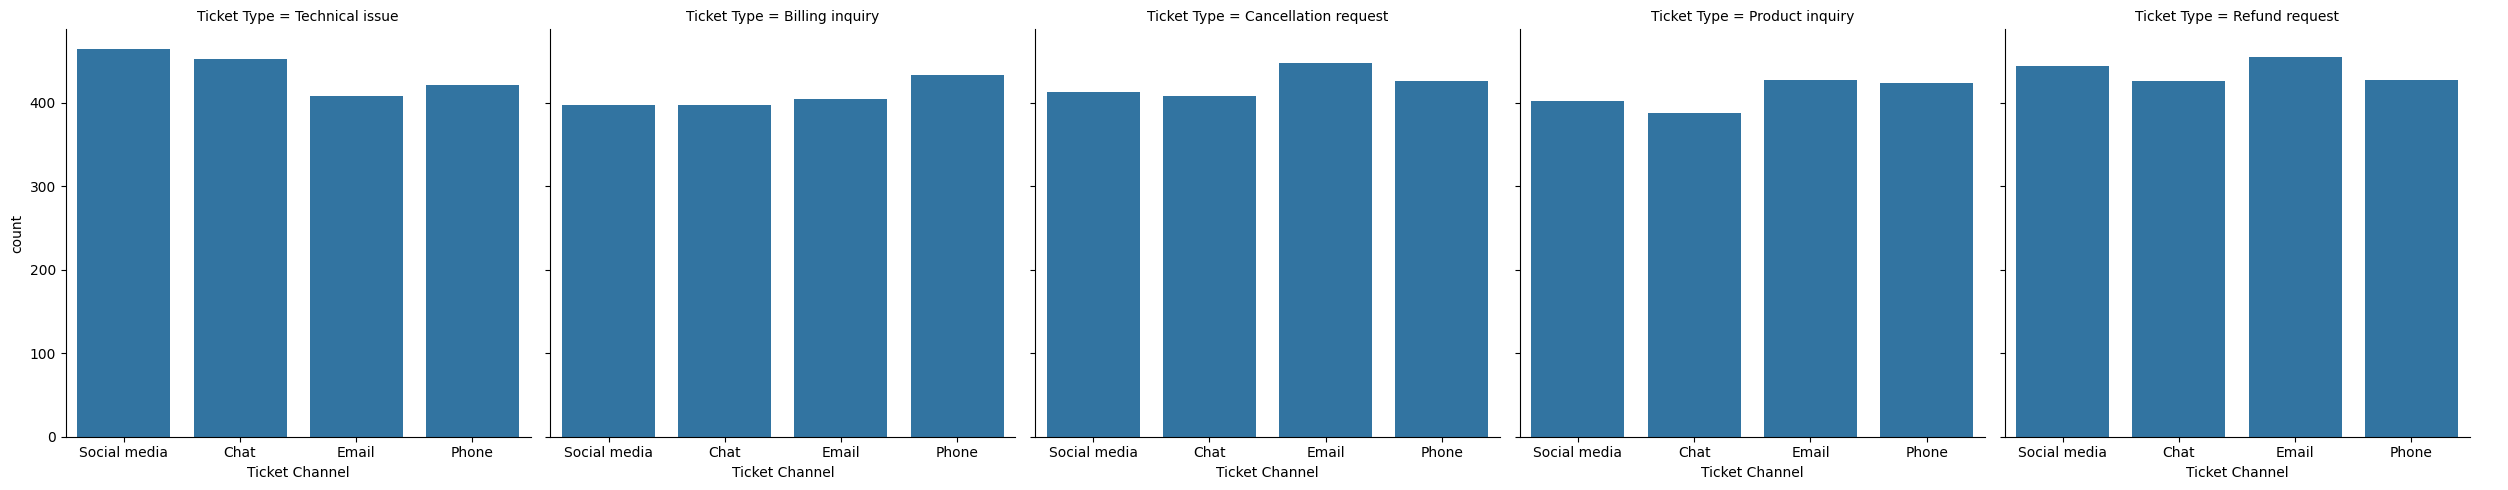

In [116]:
plt.figure(figsize=(30,10));
sns.catplot(x="Ticket Channel",
            col="Ticket Type",
            data=datos,
            kind="count");

In [152]:

pivot_table = datos.pivot_table(index='Ticket Channel', columns='Product Purchased', values='Customer Age', aggfunc=['sum'])


print(pivot_table)


                              sum                                          \
Product Purchased Adobe Photoshop Amazon Echo Amazon Kindle Apple AirPods   
Ticket Channel                                                              
Chat                         2086        2110          2810          2593   
Email                        1917        2614          1684          2219   
Phone                        1855        2301          2521          1936   
Social media                 1945        2510          1801          2847   

                                                               \
Product Purchased Asus ROG Autodesk AutoCAD Bose QuietComfort   
Ticket Channel                                                  
Chat                  1853             2720              2199   
Email                 2173             2436              1723   
Phone                 2068             1794              2269   
Social media          2304             1718              2070   

    

In [137]:

cross_tab = pd.crosstab([datos["Ticket Channel"], datos["Ticket Type"]], datos["Product Purchased"])

cross_tab["Sony PlayStation"].sum()


394

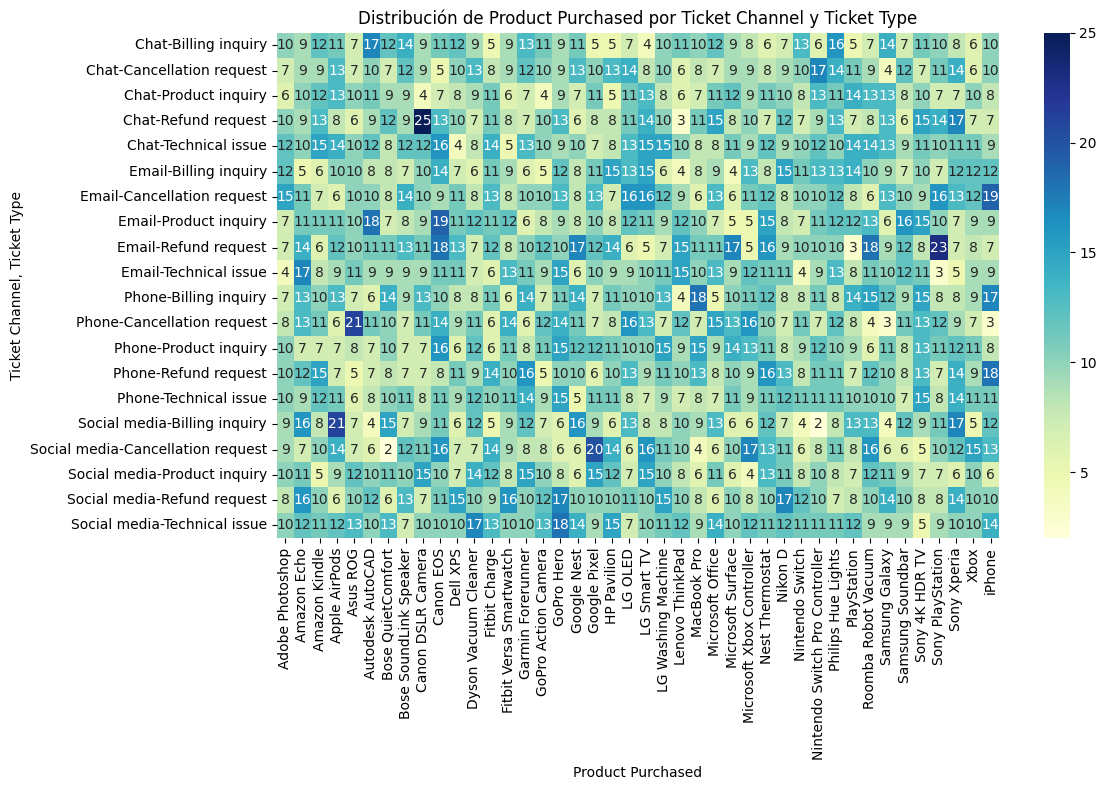

In [156]:

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, fmt="d", cbar=True)

plt.title("Distribución de Product Purchased por Ticket Channel y Ticket Type")
plt.xlabel("Product Purchased")
plt.ylabel("Ticket Channel, Ticket Type")

plt.tight_layout()
plt.show()


In [138]:
datos["Customer Satisfaction Rating"].sum()

8283.0

In [84]:
datos["Product Purchased"].unique()

array(['GoPro Hero', 'LG Smart TV', 'Dell XPS', 'Microsoft Office',
       'Autodesk AutoCAD', 'Microsoft Surface', 'Philips Hue Lights',
       'Fitbit Versa Smartwatch', 'Dyson Vacuum Cleaner',
       'Nintendo Switch', 'Microsoft Xbox Controller',
       'Nintendo Switch Pro Controller', 'Nest Thermostat',
       'Sony PlayStation', 'GoPro Action Camera', 'Xbox',
       'LG Washing Machine', 'Canon EOS', 'HP Pavilion', 'Amazon Kindle',
       'Lenovo ThinkPad', 'Fitbit Charge', 'Adobe Photoshop',
       'Google Pixel', 'Amazon Echo', 'PlayStation', 'Samsung Galaxy',
       'iPhone', 'LG OLED', 'Sony Xperia', 'Apple AirPods',
       'Sony 4K HDR TV', 'Canon DSLR Camera', 'Roomba Robot Vacuum',
       'Nikon D', 'Bose QuietComfort', 'Samsung Soundbar', 'Asus ROG',
       'Bose SoundLink Speaker', 'Google Nest', 'Garmin Forerunner',
       'MacBook Pro'], dtype=object)

In [87]:
datos["Product Purchased"] = datos["Product Purchased"].replace("PlayStation", "Sony PlayStation")


In [88]:
datos

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Grupo Edad
0,1,32,Other,GoPro Hero,2021-03-22,Technical issue,Pending Customer Response,Critical,Social media,1,0,0.0,18-35
1,2,42,Female,LG Smart TV,2021-05-22,Technical issue,Pending Customer Response,Critical,Chat,1,0,0.0,36-58
2,3,48,Other,Dell XPS,2020-07-14,Technical issue,Closed,Low,Social media,1,1,3.0,36-58
3,4,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Closed,Low,Social media,1,1,3.0,18-35
4,5,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Closed,Low,Email,1,1,1.0,59-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,22,Female,LG OLED,2021-12-08,Product inquiry,Open,Low,Phone,0,0,0.0,18-35
8465,8466,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Open,Critical,Email,0,0,0.0,18-35
8466,8467,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Closed,High,Social media,1,1,3.0,36-58
8467,8468,54,Male,Sony PlayStation,2021-10-16,Product inquiry,Closed,Medium,Email,1,1,3.0,36-58


In [281]:
datos["Product Purchased"].unique()

array(['GoPro Hero', 'LG Smart TV', 'Dell XPS', 'Microsoft Office',
       'Autodesk AutoCAD', 'Microsoft Surface', 'Philips Hue Lights',
       'Fitbit Versa Smartwatch', 'Dyson Vacuum Cleaner',
       'Nintendo Switch', 'Microsoft Xbox Controller',
       'Nintendo Switch Pro Controller', 'Nest Thermostat',
       'Sony PlayStation', 'GoPro Action Camera', 'Xbox',
       'LG Washing Machine', 'Canon EOS', 'HP Pavilion', 'Amazon Kindle',
       'Lenovo ThinkPad', 'Fitbit Charge', 'Adobe Photoshop',
       'Google Pixel', 'Amazon Echo', 'Samsung Galaxy', 'iPhone',
       'LG OLED', 'Sony Xperia', 'Apple AirPods', 'Sony 4K HDR TV',
       'Canon DSLR Camera', 'Roomba Robot Vacuum', 'Nikon D',
       'Bose QuietComfort', 'Samsung Soundbar', 'Asus ROG',
       'Bose SoundLink Speaker', 'Google Nest', 'Garmin Forerunner',
       'MacBook Pro'], dtype=object)

In [280]:
datos["Ticket Channel"].unique()

array(['Social media', 'Chat', 'Email', 'Phone'], dtype=object)

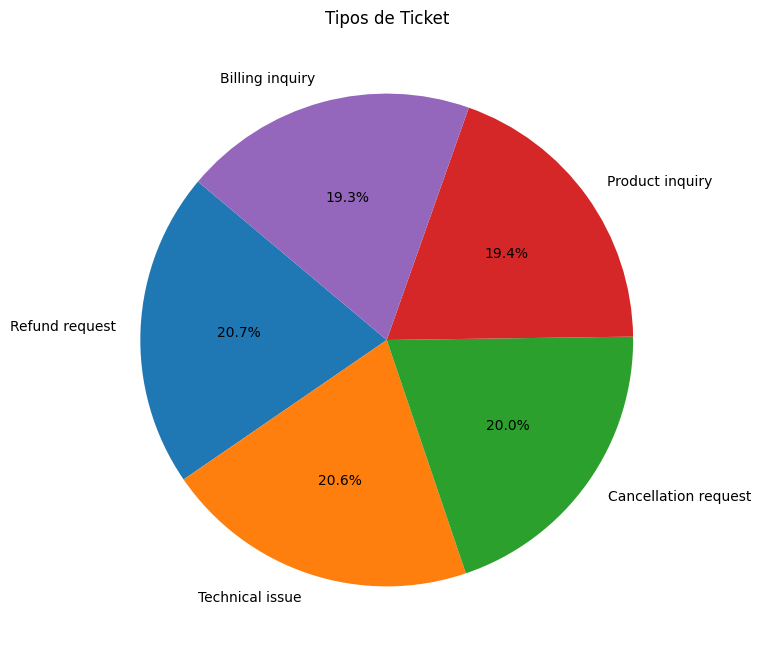

In [89]:

ticket_type_counts = datos["Ticket Type"].value_counts()

colores = plt.cm.tab10.colors[:len(ticket_type_counts)]

plt.figure(figsize=(8, 8))

plt.pie(ticket_type_counts, labels=ticket_type_counts.index, autopct='%1.1f%%', startangle=140, colors=colores)

plt.title('Tipos de Ticket')

plt.show()

In [91]:
#TICKET, AÑO Y GÉNERO? NO TIENE MUCHO SENTIDO

stats_por_tipo_ticket = datos.groupby('Ticket Type').agg({'Customer Age': ['mean', 'median', 'min', 'max'],
                                                         'Customer Gender': lambda x: x.mode()[0]})

print(stats_por_tipo_ticket)




                     Customer Age                Customer Gender
                             mean median min max        <lambda>
Ticket Type                                                     
Billing inquiry         44.247246   45.0  18  70          Female
Cancellation request    44.048378   44.0  18  70            Male
Product inquiry         43.760512   44.0  18  70            Male
Refund request          43.940068   44.0  18  70          Female
Technical issue         44.136806   44.0  18  70          Female


**Público**

Customer Age,18,19,20,21,22,23,24,25,26,27,...,61,62,63,64,65,66,67,68,69,70
Customer Gender,,,,,,,,,,,,,,,,,,,,,
Female,51,61,71,46,49,55,61,54,52,64,...,51,61,56,48,54,43,56,47,61,48
Male,60,51,45,68,54,47,57,52,52,62,...,57,57,59,46,54,49,57,50,61,58
Other,52,57,57,48,43,43,62,41,48,54,...,48,40,56,47,59,48,55,47,47,50


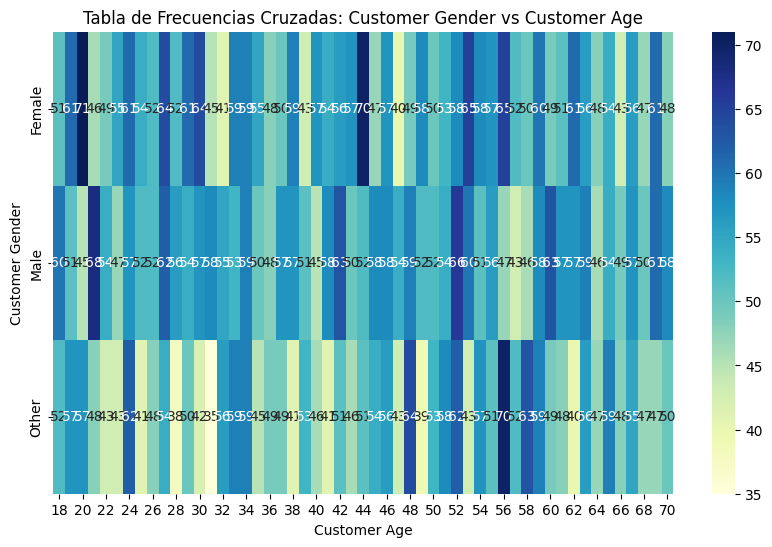

In [96]:
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_cruzada, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Tabla de Frecuencias Cruzadas: Customer Gender vs Customer Age")
plt.xlabel("Customer Age")
plt.ylabel("Customer Gender")

plt.show()


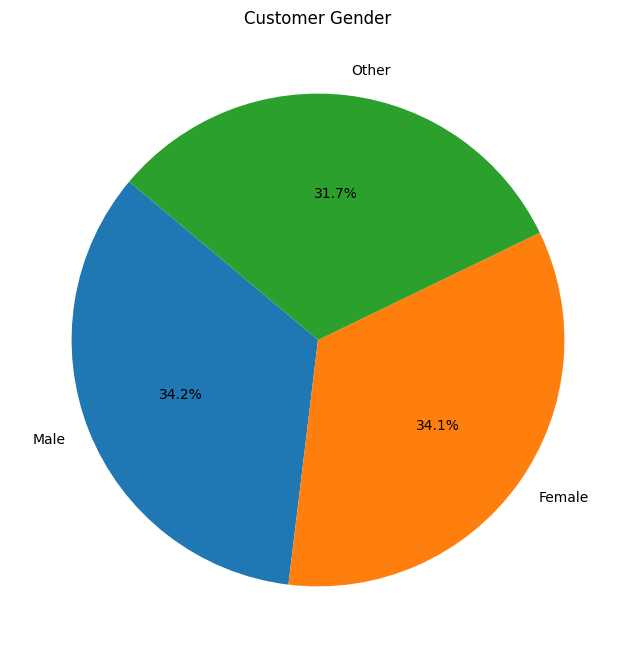

In [99]:
datos ["Customer Gender"].value_counts()


customer_gender_counts = datos["Customer Gender"].value_counts()

colores = plt.cm.tab10.colors[:len(customer_gender_counts)]

plt.figure(figsize=(8, 8))

plt.pie(customer_gender_counts, labels=customer_gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colores)

plt.title('Customer Gender')

plt.show()

In [101]:
age_filtered_data = datos[(datos["Customer Age"] >= 36) & (datos["Customer Age"] <= 58)]

ticket_channel_counts = age_filtered_data["Ticket Channel"].value_counts()

ticket_channel_mas_utilizado = ticket_channel_counts.idxmax()

print("El Ticket Channel más utilizado por clientes con edades entre 36 y 58 años es:", ticket_channel_mas_utilizado)


El Ticket Channel más utilizado por clientes con edades entre 36 y 58 años es: Email


In [102]:
age_filtered_data = datos[(datos["Customer Age"] >= 59) & (datos["Customer Age"] <= 70)]

ticket_channel_counts = age_filtered_data["Ticket Channel"].value_counts()

ticket_channel_mas_utilizado = ticket_channel_counts.idxmax()

print("El Ticket Channel más utilizado por clientes con edades entre 59 y 70 años es:", ticket_channel_mas_utilizado)


El Ticket Channel más utilizado por clientes con edades entre 59 y 70 años es: Email


In [103]:

ticket_channel_females = ticket_channel_mas_utilizado_por_genero.loc["Female"]

print("El Ticket Channel más utilizado por las Female es:", ticket_channel_females)


El Ticket Channel más utilizado por las Female es: ('Female', 'Email')


In [104]:
ticket_channel_males = ticket_channel_mas_utilizado_por_genero.loc["Male"]

print("El Ticket Channel más utilizado por las Male es:", ticket_channel_males)


El Ticket Channel más utilizado por las Male es: ('Male', 'Social media')


In [2]:
#CANAL POR GÉNERO 

ticket_channel_por_genero = datos.groupby("Customer Gender")["Ticket Channel"].value_counts()

ticket_channel_mas_utilizado_por_genero = ticket_channel_por_genero.groupby(level=0).idxmax()

print("Ticket Channel más utilizado por Customer Gender:")
print(ticket_channel_mas_utilizado_por_genero)


NameError: name 'datos' is not defined

In [141]:
# GENERO POR GRUPO DE EDAD 

categorias_edad = pd.cut(datos["Customer Age"], bins=[18, 30, 43, 56, 70], labels=["18-30", "31-43","44-55", "56-70"])

datos["Grupo Edad"] = categorias_edad

conteo_genero_por_edad = datos.groupby(["Grupo Edad", "Customer Gender"]).size().unstack()

conteo_genero_por_edad


C:\Users\The Bridge\AppData\Local\Temp\ipykernel_23372\3142579409.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_genero_por_edad = datos.groupby(["Grupo Edad", "Customer Gender"]).size().unstack()


Customer Gender,Female,Male,Other
Grupo Edad,,,
18-30,690,655,583
31-43,683,704,630
44-55,727,719,701
56-70,736,758,720


In [1]:
#CANAL POR EDAD 

categorias_edad = pd.cut(datos["Customer Age"], bins=[18, 35, 58, 70], labels=["18-35", "36-58", "59-70"])

datos["Grupo Edad"] = categorias_edad

conteo_tickets_por_edad_y_channel = datos.groupby(["Grupo Edad", "Ticket Channel"]).size().unstack()

ticket_channel_mas_utilizado_por_edad = conteo_tickets_por_edad_y_channel.idxmax(axis=1)

print(ticket_channel_mas_utilizado_por_edad)


NameError: name 'pd' is not defined

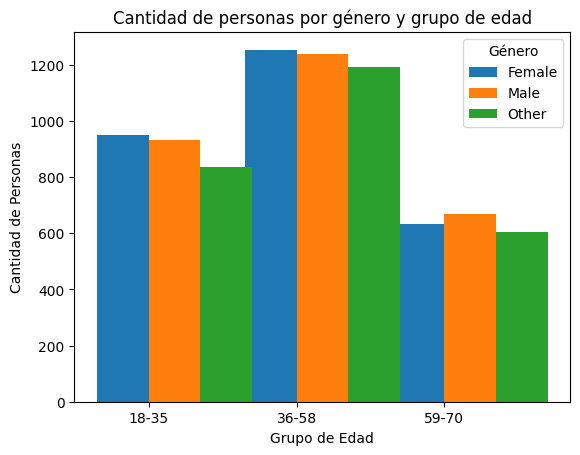

In [107]:
#GRÁFICA POR GRUPOS DE EDAD Y GÉNERO 

# Datos
ancho_barra = 0.35
x = np.arange(len(grupos_edad))

fig, ax = plt.subplots()

for i, genero in enumerate(generos):
    ax.bar(x + ancho_barra * i, datos_genero_por_edad[i], width=ancho_barra, label=genero)

ax.set_title("Cantidad de personas por género y grupo de edad")
ax.set_xlabel("Grupo de Edad")
ax.set_ylabel("Cantidad de Personas")
ax.set_xticks(x + ancho_barra / 2)
ax.set_xticklabels(grupos_edad)
ax.legend(title="Género", loc="upper right")

plt.show()


***Producto***

In [139]:
categorias_edad = pd.cut(datos["Customer Age"], bins=[18, 35, 58, 70], labels=["18-35", "36-58", "59-70"])

datos["Grupo Edad"] = categorias_edad

conteo_tickets_por_edad_y_channel = datos.groupby(["Grupo Edad", "Product Purchased"]).size().unstack()

ticket_channel_mas_utilizado_por_edad = conteo_tickets_por_edad_y_channel.idxmax(axis=1)

ticket_channel_mas_utilizado_por_edad

C:\Users\The Bridge\AppData\Local\Temp\ipykernel_23372\4022916235.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_tickets_por_edad_y_channel = datos.groupby(["Grupo Edad", "Product Purchased"]).size().unstack()


Grupo Edad
18-35    Sony PlayStation
36-58    Sony PlayStation
59-70    Sony PlayStation
dtype: object

In [110]:
#TIPO DE TICKET MÁS RECURRENTE POR PRODUCTO 
ticket_type_mas_recurrente_por_producto = datos.groupby("Product Purchased")["Ticket Type"].agg(lambda x: x.value_counts().idxmax())

print("Ticket Type más recurrente por cada producto de Product Purchased:")
print(ticket_type_mas_recurrente_por_producto)


Ticket Type más recurrente por cada producto de Product Purchased:
Product Purchased
Adobe Photoshop                   Cancellation request
Amazon Echo                             Refund request
Amazon Kindle                          Technical issue
Apple AirPods                          Billing inquiry
Asus ROG                          Cancellation request
Autodesk AutoCAD                       Product inquiry
Bose QuietComfort                      Billing inquiry
Bose SoundLink Speaker            Cancellation request
Canon DSLR Camera                       Refund request
Canon EOS                              Product inquiry
Dell XPS                                Refund request
Dyson Vacuum Cleaner                   Product inquiry
Fitbit Charge                           Refund request
Fitbit Versa Smartwatch                 Refund request
Garmin Forerunner                      Technical issue
GoPro Action Camera                    Technical issue
GoPro Hero                         

In [133]:
ticket_types_por_producto = datos.groupby("Product Purchased")["Ticket Type"].nunique()

producto_mas_tickets_types = ticket_types_por_producto.idxmax()

print("El producto con más Ticket Types es:", producto_mas_tickets_types)


El producto con más Ticket Types es: Adobe Photoshop


In [132]:
conteo_ticket_types_por_producto = datos.groupby("Product Purchased")["Ticket Type"].nunique()

producto_mas_ticket_types = conteo_ticket_types_por_producto.idxmax()

cantidad_tickets = conteo_ticket_types_por_producto.max()

print("El producto de Product Purchased con más Ticket Types es:", producto_mas_ticket_types)
print("Cantidad de tickets asociados:", cantidad_tickets)


El producto de Product Purchased con más Ticket Types es: Adobe Photoshop
Cantidad de tickets asociados: 5


In [116]:
datos["Ticket Type"].count()

8469

In [119]:
datos["Product Purchased"].unique()

array(['GoPro Hero', 'LG Smart TV', 'Dell XPS', 'Microsoft Office',
       'Autodesk AutoCAD', 'Microsoft Surface', 'Philips Hue Lights',
       'Fitbit Versa Smartwatch', 'Dyson Vacuum Cleaner',
       'Nintendo Switch', 'Microsoft Xbox Controller',
       'Nintendo Switch Pro Controller', 'Nest Thermostat',
       'Sony PlayStation', 'GoPro Action Camera', 'Xbox',
       'LG Washing Machine', 'Canon EOS', 'HP Pavilion', 'Amazon Kindle',
       'Lenovo ThinkPad', 'Fitbit Charge', 'Adobe Photoshop',
       'Google Pixel', 'Amazon Echo', 'Samsung Galaxy', 'iPhone',
       'LG OLED', 'Sony Xperia', 'Apple AirPods', 'Sony 4K HDR TV',
       'Canon DSLR Camera', 'Roomba Robot Vacuum', 'Nikon D',
       'Bose QuietComfort', 'Samsung Soundbar', 'Asus ROG',
       'Bose SoundLink Speaker', 'Google Nest', 'Garmin Forerunner',
       'MacBook Pro'], dtype=object)

In [259]:
#PRODUCTO CON MÁS TICKETS CRÍTICOS 
tickets_critical = datos[datos["Ticket Priority"] == "Critical"]

tickets_critical_por_producto = tickets_critical.groupby("Product Purchased").size()

producto_mas_tickets_critical = tickets_critical_por_producto.idxmax()
total_tickets_critical_mas_comun = tickets_critical_por_producto.max()

print(f"Producto de Product Purchased con más tickets clasificados como 'Critical': {producto_mas_tickets_critical}")
print(f"Número total de tickets clasificados como 'Critical' para este producto: {total_tickets_critical_mas_comun}")


Producto de Product Purchased con más tickets clasificados como 'Critical': Sony PlayStation
Número total de tickets clasificados como 'Critical' para este producto: 91


In [264]:
#TIPO DE TICKETS PARA SOCIAL MEDIA 
tickets_social_media = datos[datos["Ticket Channel"] == "Social media"]

cantidad_closed = tickets_social_media[tickets_social_media["Ticket Status"] == "Closed"].shape[0]
cantidad_open = tickets_social_media[tickets_social_media["Ticket Status"] == "Open"].shape[0]
cantidad_pending = tickets_social_media[tickets_social_media["Ticket Status"] == "Pending Customer Response"].shape[0]

print("Cantidad de tickets 'Closed' en Social Media:", cantidad_closed)
print("Cantidad de tickets 'Open' en Social Media:", cantidad_open)
print("Cantidad de tickets 'Pending Customer Response' en Social Media:", cantidad_pending)

Cantidad de tickets 'Closed' en Social Media: 684
Cantidad de tickets 'Open' en Social Media: 697
Cantidad de tickets 'Pending Customer Response' en Social Media: 740


In [267]:
#MEJOR CALIFICACIÒN POR CANAL 
ticket_channels = datos["Ticket Channel"].unique()

resultados_por_canal = {}


for channel in ticket_channels:
    
    ticket_channel_data = datos[datos["Ticket Channel"] == channel]
    
    total_5_rating = ticket_channel_data[ticket_channel_data["Customer Satisfaction Rating"] == 5.0].shape[0]
    
    resultados_por_canal[channel] = total_5_rating

for channel, total in resultados_por_canal.items():
    print(f"Cantidad de resultados con Customer Satisfaction Rating igual a 5.0 en el canal de ticket '{channel}': {total}")


Cantidad de resultados con Customer Satisfaction Rating igual a 5.0 en el canal de ticket 'Social media': 123
Cantidad de resultados con Customer Satisfaction Rating igual a 5.0 en el canal de ticket 'Chat': 146
Cantidad de resultados con Customer Satisfaction Rating igual a 5.0 en el canal de ticket 'Email': 140
Cantidad de resultados con Customer Satisfaction Rating igual a 5.0 en el canal de ticket 'Phone': 135


In [273]:
#CALIFICACIÓN POR CANAL DE CONTACTO 

datos_no_cero = datos[datos["Customer Satisfaction Rating"] != 0.0]

promedio_satisfaccion_por_canal = datos_no_cero.groupby("Ticket Channel")["Customer Satisfaction Rating"].mean()

print("Promedio de satisfacción por Ticket Channel:")
print(promedio_satisfaccion_por_canal)


Promedio de satisfacción por Ticket Channel:
Ticket Channel
Chat            3.083086
Email           2.963889
Phone           2.952243
Social media    2.969298
Name: Customer Satisfaction Rating, dtype: float64
